In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split

import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras._tf_keras.keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from keras._tf_keras.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub


#Data Collection

In [ ]:
normal_path = "/content/drive/MyDrive/Brain_Data_Organised/Normal"
stroke_path = "/content/drive/MyDrive/Brain_Data_Organised/Stroke"



In [ ]:
normal_folder = os.listdir(normal_path)
stroke_folder = os.listdir(stroke_path)

In [ ]:
print("Images in Normal Data:",len(normal_folder))
print("Images in Stroke Data:",len(stroke_folder))



Images in Normal Data: 1551
Images in Stroke Data: 950


#Image Data Preprocessing

In [ ]:
# Every image have different size so we have to do resize of each image
# Standarizing the data
# but we have to mixed all the images to make a single data

# IMAGE PROCESSING
# Resize the Images

# Convert the images to numpy arrays


In [ ]:
normal_path = "/content/drive/MyDrive/Brain_Data_Organised/Normal"
stroke_path = "/content/drive/MyDrive/Brain_Data_Organised/Stroke"

data = []

for img_file in normal_folder:
    image = Image.open("/content/drive/MyDrive/Brain_Data_Organised/Normal/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

for img_file in stroke_folder:
    image = Image.open("/content/drive/MyDrive/Brain_Data_Organised/Stroke/" + img_file)
    image = image.resize((224,224))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)


In [ ]:
len(data)


2501

In [ ]:
data[0].shape


(224, 224, 3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
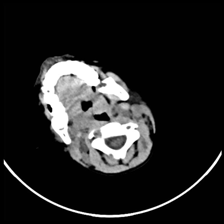

In [ ]:
data[0]


#Class Labels

In [ ]:
normal_label = [0]*len(normal_folder)
stroke_label = [1]*len(stroke_folder)

In [ ]:
Target_label = normal_label + stroke_label

In [ ]:
len(Target_label)


2501

#Convert Image data and target labels into array

In [ ]:
x = np.array(data)
y = np.array(Target_label)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
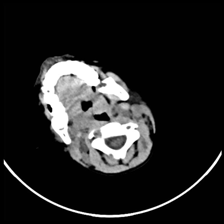

In [ ]:
x[0]

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

#Split the Data for training and testing purpose.

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2250, 224, 224, 3)
(251, 224, 224, 3)
(2250,)
(251,)


#Scale The Data

In [ ]:
x_train_s = x_train/255
x_test_s = x_test/255

#Image Data Visualization

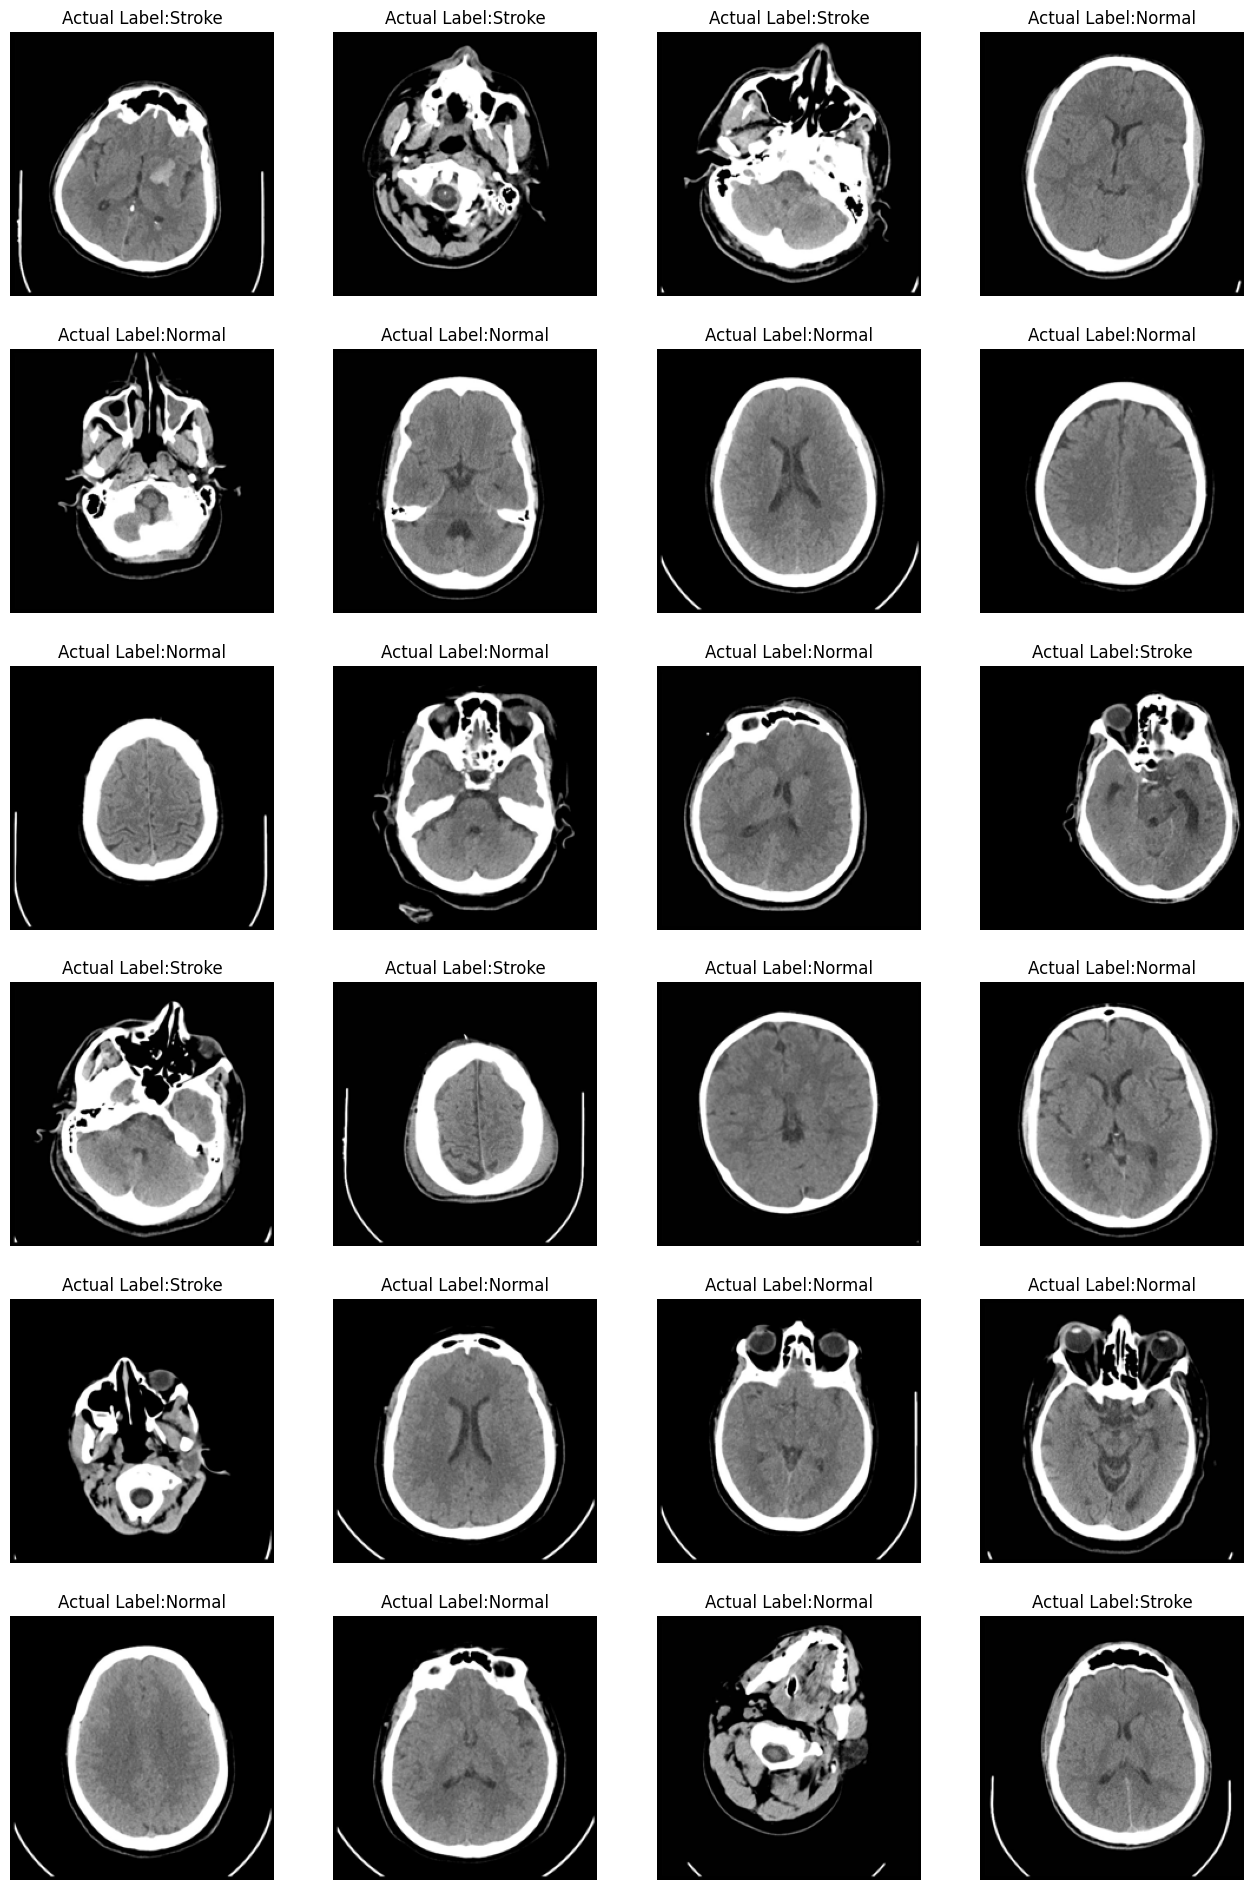

In [ ]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,24))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(x_train[i])
    plt.title(f"Actual Label:{class_labels[y_train[i]]}")
    plt.axis("off")

#Create Model Using CNN

In [ ]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 80)        │          72,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          46,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │      21,632,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,004,525 (83.94 MB)

 Trainable params: 22,004,525 (83.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train_s,y_train,batch_size=32,
         epochs=10, validation_data=(x_test_s,y_test))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 622s 9s/step - accuracy: 0.8683 - loss: 0.2966 - val_accuracy: 0.8765 - val_loss: 0.2741
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 679s 9s/step - accuracy: 0.9463 - loss: 0.1171 - val_accuracy: 0.9602 - val_loss: 0.1044
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 617s 9s/step - accuracy: 0.9879 - loss: 0.0358 - val_accuracy: 0.9602 - val_loss: 0.0884
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 623s 9s/step - accuracy: 0.9866 - loss: 0.0293 - val_accuracy: 0.9761 - val_loss: 0.0814
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 618s 9s/step - accuracy: 0.9902 - loss: 0.0326 - val_accuracy: 0.9402 - val_loss: 0.2659
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 621s 9s/step - accuracy: 0.9901 - loss: 0.0270 - val_accuracy: 0.9721 - val_loss: 0.0941
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 615s 9s/step - accuracy: 0.9948 - loss: 0.0122 - val_accuracy: 0.9801 - val_loss: 0.0702
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 618s 9s/step - accuracy: 0.9985 - loss: 0.0029 - val_accuracy: 0.9681 - v

In [ ]:
# Save the entire model as a `.keras` zip archive.
model.save('/content/drive/MyDrive/StrokeDetectionModel.keras')

#Model Evaluation on Test and Train Data

In [ ]:
loss, acc = model.evaluate(x_test_s,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(x_train_s,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9836 - loss: 0.0839
Loss on Test Data: 0.08532068878412247
Accuracy on Test Data: 0.980079710483551
71/71 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 1.0000 - loss: 4.5945e-05
Loss on Train Data: 3.6567267670761794e-05
Accuracy on Train Data: 1.0


#Predictions on Test Image Data

In [ ]:
y_pred_test = model.predict(x_test_s)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step


In [ ]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: [0 0 1 0 1 0 1 0 0 0]
Predicted Label: [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]


#Metrics Evaluation On Test Data

In [ ]:
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_test_label))
print()
print("Classification Report:\n",classification_report(y_test,y_pred_test_label))


-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[152   4]
 [  1  94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       156
           1       0.96      0.99      0.97        95

    accuracy                           0.98       251
   macro avg       0.98      0.98      0.98       251
weighted avg       0.98      0.98      0.98       251



#ROC - Curve

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_prob = model.predict(x_test_s)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step
ROC - Area :0.9989203778677462


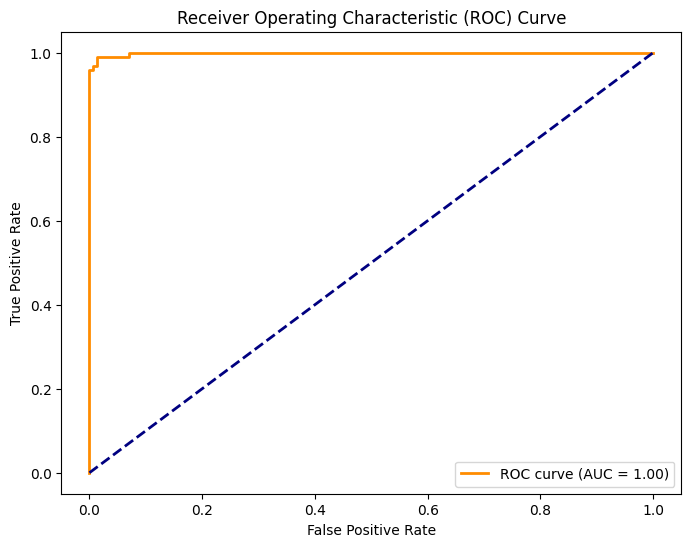

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#PR Curve

In [ ]:
y_prob = model.predict(x_test_s)

precision, recall, threshold = precision_recall_curve(y_test, y_prob)

# Compute ROC curve and ROC area
pr_auc = auc(recall,precision)
print(f"PR - Area :{pr_auc}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step
PR - Area :0.9983454056037215


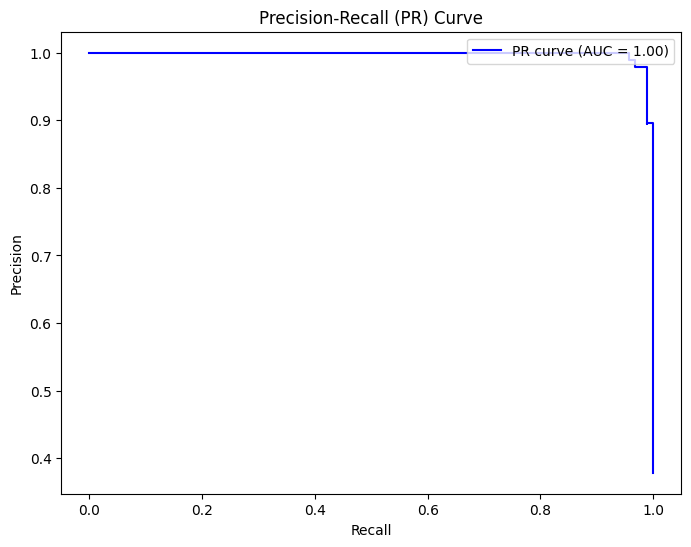

In [ ]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

#Image Predictions on Test Data

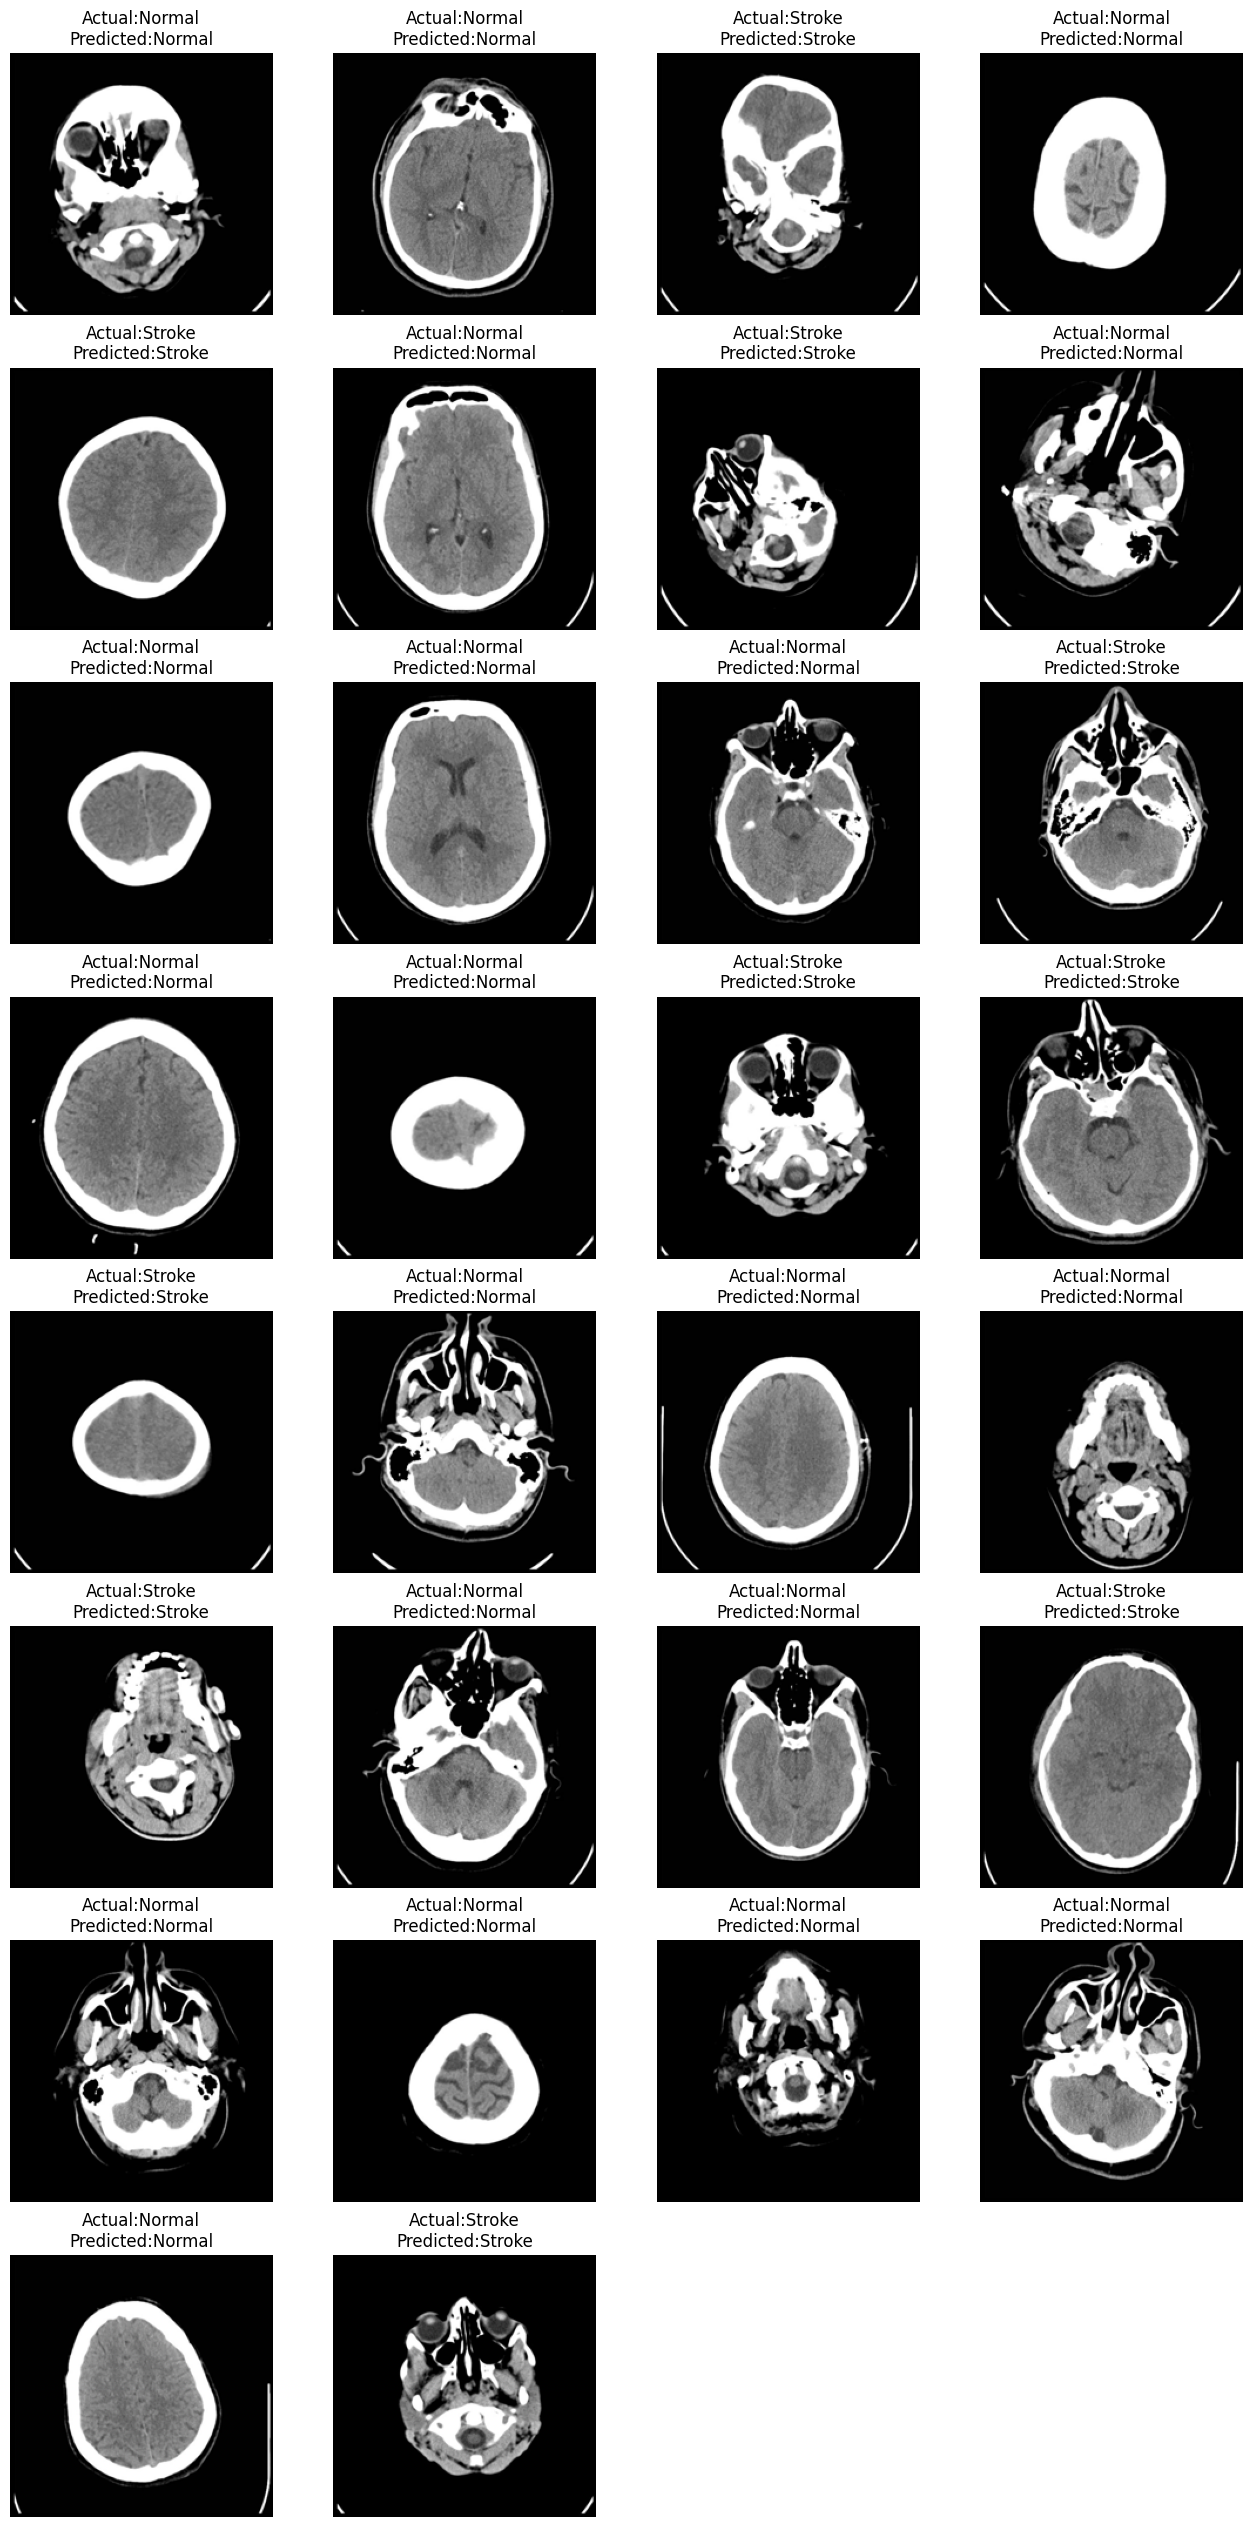

In [ ]:
class_labels = ["Normal","Stroke"]
plt.figure(figsize=(16,32))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_labels[y_test[i]]}\nPredicted:{class_labels[y_pred_test_label[i]]}")
    plt.axis("off")


#Stroke Prediciton for Single Image

In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf

#Image Processing
da =[]
imag = Image.open("/content/drive/MyDrive/Brain_Data_Organised/Stroke/58 (1).jpg")
imag = imag.resize((224,224))
imag = imag.convert('RGB')
imag = np.array(imag)
da.append(imag)
Imagg = np.array(da)
#print(Imagg[0])
#Scaling
imagg_s = Imagg/255
#load saved model
new_model = tf.keras.models.load_model('/content/drive/MyDrive/StrokeDetectionTrainedModel.keras')
# Show the model architecture
#new_model.summary()
# Test the restored model
imag_pred = new_model.predict(imagg_s)
imag_pred_label = [1 if i>=0.5 else 0 for i in imag_pred]
if imag_pred_label[0] == 1:
  print("You have probability of more than 50% of having Brain Stroke.")
else:
  print("There is no probability of having you Brain Stroke")
